In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
df=pd.read_csv("JFK_DA_delay_des_reason.csv")

In [3]:
df

,Date (MM/DD/YYYY),Destination Airport,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
0,01/01/2017,ATL,88.0,10.0,0.0,1.0,0.0,68.0,2017-01-01
1,01/01/2017,AUS,-2.0,0.0,0.0,0.0,0.0,0.0,2017-01-01
2,01/01/2017,BOS,-22.0,0.0,0.0,0.0,0.0,0.0,2017-01-01
3,01/01/2017,DEN,-8.0,0.0,0.0,0.0,0.0,0.0,2017-01-01
4,01/01/2017,DTW,-5.0,0.0,0.0,0.0,0.0,0.0,2017-01-01
...,...,...,...,...,...,...,...,...,...
25869,12/31/2018,SJU,-3.0,0.0,0.0,15.0,0.0,0.0,2018-12-31
25870,12/31/2018,SLC,-9.0,0.0,0.0,0.0,0.0,0.0,2018-12-31
25871,12/31/2018,SNA,-8.0,0.0,0.0,0.0,0.0,0.0,2018-12-31
25872,12/31/2018,STT,-3.0,0.0,0.0,0.0,0.0,0.0,2018-12-31


In [4]:
df1=df.groupby(['Date (MM/DD/YYYY)'],as_index=False).sum()

In [5]:
df1.head(100)

,Date (MM/DD/YYYY),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,01/01/2017,4.0,69.0,0.0,116.0,0.0,80.0
1,01/01/2018,940.0,279.0,104.0,81.0,0.0,159.0
2,01/01/2019,28.0,83.0,0.0,55.0,0.0,29.0
3,01/02/2017,999.0,345.0,0.0,688.0,0.0,176.0
4,01/02/2018,1452.0,433.0,145.0,124.0,0.0,21.0
...,...,...,...,...,...,...,...
95,02/01/2019,1870.0,967.0,0.0,258.0,0.0,45.0
96,02/02/2017,325.0,89.0,0.0,652.0,0.0,69.0
97,02/02/2018,271.0,211.0,0.0,646.0,0.0,42.0
98,02/02/2019,204.0,22.0,0.0,52.0,0.0,94.0


In [6]:
df1['Date'] = pd.to_datetime(df1['Date (MM/DD/YYYY)'])

In [7]:
df1=df1.drop(['Date (MM/DD/YYYY)'],axis=1)

In [8]:
df2=df1.sort_values(by=['Date'],ascending=False)

In [9]:
df2

,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
818,127.0,138.0,0.0,44.0,0.0,54.0,2019-09-30
815,235.0,200.0,0.0,66.0,0.0,43.0,2019-09-29
812,-124.0,24.0,0.0,176.0,0.0,16.0,2019-09-28
809,43.0,56.0,0.0,219.0,0.0,78.0,2019-09-27
806,1056.0,180.0,0.0,1129.0,69.0,308.0,2019-09-26
...,...,...,...,...,...,...,...
12,400.0,318.0,0.0,477.0,0.0,60.0,2017-01-05
9,625.0,454.0,0.0,181.0,0.0,23.0,2017-01-04
6,631.0,230.0,0.0,531.0,0.0,50.0,2017-01-03
3,999.0,345.0,0.0,688.0,0.0,176.0,2017-01-02


In [10]:
df2['Half year']=pd.qcut(df2['Date'],q=12)

In [11]:
df3=df2.groupby('Half year')

In [12]:
df4=df3[['Departure delay (Minutes)','Delay Carrier (Minutes)','Delay Weather (Minutes)','Delay National Aviation System (Minutes)','Delay Security (Minutes)','Delay Late Aircraft Arrival (Minutes)']].sum()

In [13]:
df4.sort_values(by=['Departure delay (Minutes)'],ascending=False)

,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
Half year,,,,,,
"(2017-03-25 12:00:00, 2017-06-17]",164695.0,49012.0,2302.0,49839.0,303.0,57268.0
"(2019-07-08 12:00:00, 2019-09-30]",163894.0,56912.0,10467.0,68709.0,675.0,33102.0
"(2018-05-17, 2018-08-08 12:00:00]",146860.0,43767.0,8610.0,56746.0,184.0,36758.0
"(2017-06-17, 2017-09-08 12:00:00]",118729.0,45070.0,6384.0,51610.0,245.0,25846.0
"(2019-04-16, 2019-07-08 12:00:00]",117650.0,50598.0,3628.0,44298.0,569.0,31227.0
"(2016-12-31 23:59:59.999999999, 2017-03-25 12:00:00]",83572.0,23792.0,26140.0,29588.0,250.0,13230.0
"(2019-01-22 12:00:00, 2019-04-16]",76522.0,37079.0,5465.0,45243.0,111.0,14906.0
"(2017-12-01, 2018-02-22 12:00:00]",74532.0,30155.0,15384.0,23926.0,96.0,10694.0
"(2018-10-31, 2019-01-22 12:00:00]",67513.0,26699.0,9554.0,24335.0,0.0,12445.0


In [14]:
y_axis=[]

In [15]:
a=df1['Delay Carrier (Minutes)'].sum()
b=df1['Delay Weather (Minutes)'].sum()
c=df1['Delay National Aviation System (Minutes)'].sum()
d=df1['Delay Security (Minutes)'].sum()
e=df1['Delay Late Aircraft Arrival (Minutes)'].sum()
x_axis=['Delay Carrier (Minutes)','Delay Weather (Minutes)','Delay National Aviation System (Minutes)','Delay Security (Minutes)','Delay Late Aircraft Arrival (Minutes)']
y_axis=[a,b,c,d,e]

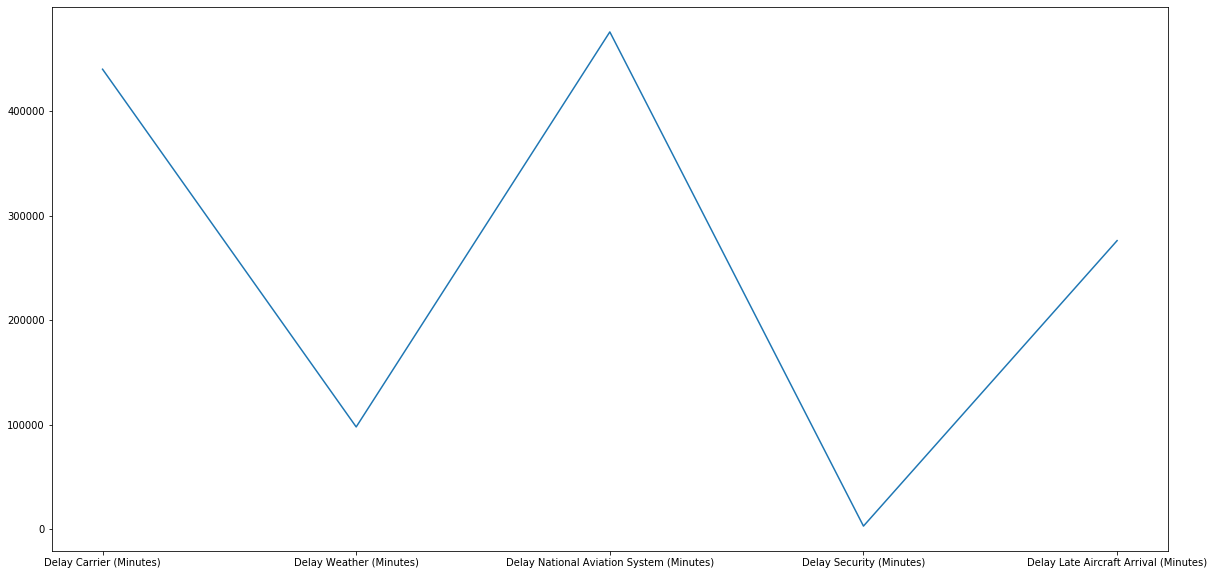

In [16]:
plt.figure(figsize=(20,10))
plt.plot(x_axis,y_axis)

plt.savefig("delay_reason.png")

Is there any relationship between delay carrier and delay weather?

In [17]:
population1 = df1['Departure delay (Minutes)']

In [18]:
population2 = df1['Delay Weather (Minutes)']

In [19]:
df['Delay Weather (Minutes)'].sum()

98047.0

In [20]:
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=17.60930732416077, pvalue=1.119142378629864e-61)

In [21]:
population3= df1['Delay Carrier (Minutes)']

In [22]:
df1['Delay Carrier (Minutes)'].sum()

440292.0

In [23]:
stats.ttest_ind(population1, population3, equal_var=False)

Ttest_indResult(statistic=11.785878372356672, pvalue=1.8207174499441065e-30)

In [24]:
population4= df1['Delay National Aviation System (Minutes)']

In [25]:
df['Delay National Aviation System (Minutes)'].sum()

475990.0

In [26]:
stats.ttest_ind(population1, population4, equal_var=False)

Ttest_indResult(statistic=10.891913682690745, pvalue=1.501728387616626e-26)

In [27]:
population5= df1['Delay Late Aircraft Arrival (Minutes)']

In [28]:
df1['Delay Late Aircraft Arrival (Minutes)'].sum()

276284.0

In [29]:
stats.ttest_ind(population1, population5, equal_var=False)

Ttest_indResult(statistic=14.650757922489378, pvalue=9.441776202940994e-45)

In [30]:
df1['Delay Security (Minutes)'].sum()

3170.0

In [31]:
stats.f_oneway(population2,population3,population4,population5)

F_onewayResult(statistic=73.33870564918412, pvalue=3.57211571437158e-46)

In [32]:
df.count()

Date (MM/DD/YYYY)                           25874
Destination Airport                         25874
Departure delay (Minutes)                   25874
Delay Carrier (Minutes)                     25874
Delay Weather (Minutes)                     25874
Delay National Aviation System (Minutes)    25874
Delay Security (Minutes)                    25874
Delay Late Aircraft Arrival (Minutes)       25874
Date                                        25874
dtype: int64

In [33]:
y=df['Departure delay (Minutes)']

In [34]:
x=df['Delay Weather (Minutes)']

In [35]:
(slope, intercept, _, _, _) = linregress(x, y)
fit = slope * x + intercept

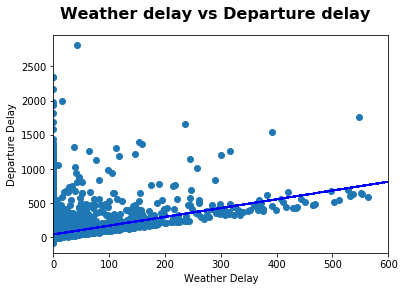

In [36]:
fig, ax = plt.subplots()

fig.suptitle("Weather delay vs Departure delay", fontsize=16, fontweight="bold")
ax.set_xlim(0, 600)

ax.set_xlabel("Weather Delay")
ax.set_ylabel("Departure Delay")

ax.plot(x, y, linewidth=0, marker='o')
ax.plot(x, fit, 'b--')

plt.show()

In [37]:
stats.ttest_ind(x, y, equal_var=False)

Ttest_indResult(statistic=-48.579830873023546, pvalue=0.0)

In [38]:
x1=df['Delay Carrier (Minutes)']

In [39]:
(slope, intercept, _, _, _) = linregress(x1, y)
fit1 = slope * x1 + intercept

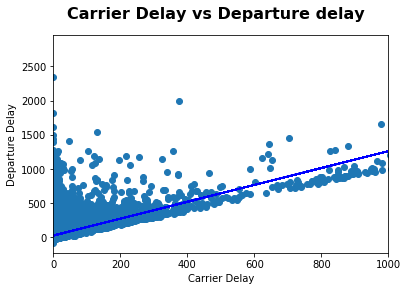

In [40]:
fig, ax = plt.subplots()

fig.suptitle("Carrier Delay vs Departure delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 1000)

ax.set_xlabel("Carrier Delay")
ax.set_ylabel("Departure Delay")

ax.plot(x1, y, linewidth=0, marker='o')
ax.plot(x1, fit1, 'b--')

plt.show()

In [41]:
stats.ttest_ind(x1, y, equal_var=False)

Ttest_indResult(statistic=-30.229863784304808, pvalue=1.5412369920128566e-198)

In [42]:
x2=df['Delay National Aviation System (Minutes)']

In [43]:
(slope, intercept, _, _, _) = linregress(x2, y)
fit2 = slope * x2 + intercept

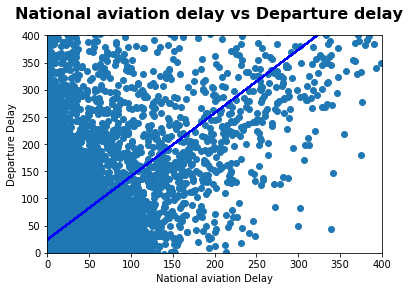

In [44]:
fig, ax = plt.subplots()

fig.suptitle("National aviation delay vs Departure delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 400)
ax.set_ylim(0, 400)

ax.set_xlabel("National aviation Delay")
ax.set_ylabel("Departure Delay")

ax.plot(x2, y, linewidth=0, marker='o')
ax.plot(x2, fit2, 'b--')

plt.show()

In [45]:
stats.ttest_ind(x2, y, equal_var=False)

Ttest_indResult(statistic=-29.593488374523908, pvalue=2.7838084540709896e-190)

In [46]:
x3=df['Delay Late Aircraft Arrival (Minutes)']

In [47]:
(slope, intercept, _, _, _) = linregress(x3, y)
fit3 = slope * x3 + intercept

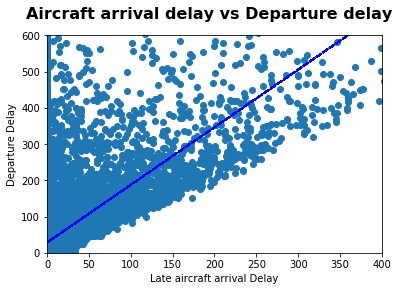

In [48]:
fig, ax = plt.subplots()

fig.suptitle("Aircraft arrival delay vs Departure delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 400)
ax.set_ylim(0, 600)

ax.set_xlabel("Late aircraft arrival Delay")
ax.set_ylabel("Departure Delay")

ax.plot(x3, y, linewidth=0, marker='o')
ax.plot(x3, fit3, 'b--')

plt.show()

In [49]:
stats.ttest_ind(x3, y, equal_var=False)

Ttest_indResult(statistic=-40.38106101052028, pvalue=0.0)

In [50]:
x4=df['Delay Security (Minutes)']

In [51]:
(slope, intercept, _, _, _) = linregress(x4, y)
fit4 = slope * x4 + intercept

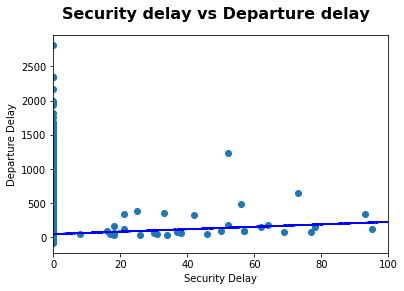

In [52]:
fig, ax = plt.subplots()

fig.suptitle("Security delay vs Departure delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 100)

ax.set_xlabel("Security Delay")
ax.set_ylabel("Departure Delay")

ax.plot(x4, y, linewidth=0, marker='o')
ax.plot(x4, fit4, 'b--')

plt.show()